Linear Regression 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import copy 

Creating a Dataframe:
creating a d_train dataframe from the provided the dataset

In [3]:
d_train = pd.read_csv("Lineardata_train.csv")

Labeling the data

In [4]:
X = d_train[d_train.columns.values]
X = X.drop(['target'], axis=1)
Y = d_train[['target']]

In [5]:
print(f"x Shape: {X.shape}, X Type:{type(X)}")
print(f"y Shape: {Y.shape}, y Type:{type(Y)}")

x Shape: (50000, 20), X Type:<class 'pandas.core.frame.DataFrame'>
y Shape: (50000, 1), y Type:<class 'pandas.core.frame.DataFrame'>


Splitting the data:
70% of data in the training set and
30% of the data in the cross validation set

In [6]:
x_train = X[:35000]
y_train = Y[:35000]
x_test = X[35000:]
y_test = Y[35000:]

In [7]:
x_train = x_train.to_numpy().reshape(35000,20)
y_train = y_train.to_numpy().reshape(35000)
x_test = x_test.to_numpy().reshape(15000,20)
y_test = y_test.to_numpy().reshape(15000,)

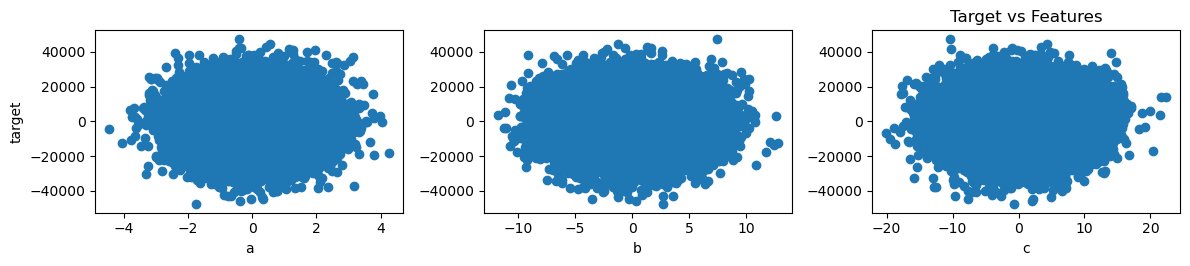

In [44]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3))
plt.title('Target vs Features')
ax[0].scatter(x_train[:,0], y_train)
ax[0].set_xlabel('a'); ax[0].set_ylabel('target')

ax[1].scatter(x_train[:,1], y_train)
ax[1].set_xlabel('b'); ax[0].set_ylabel('target')

ax[2].scatter(x_train[:,2], y_train)
ax[2].set_xlabel('c'); ax[0].set_ylabel('target')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Initializing w and b parameters

In [12]:
b_initial = 0.0000
w_initial = np.random.rand(20,)
lambda_tmp  = 0.01

Model prediction 

In [13]:
def prediction(x, w, b):
    y_pred = np.dot(x,w) + b
    return y_pred

In [14]:
prediction(x_train, w_initial, b_initial)

array([-102.97768741,  -21.66793791, -333.37811427, ...,  105.97992184,
         87.06649698, -374.72957307])

Computation of Cost

In [15]:
def compute_cost(x, y, w, b, lambda_):
    m = x.shape[0]
    y_pred = prediction(x, w, b)
    err = y_pred - y
    j = np.matmul(np.transpose(err),err)/(2*m)
    reguralization = np.matmul(np.transpose(w),w)*lambda_/(2*m)
    j_reguralized = j + reguralization
    return j_reguralized

In [16]:
lambda_tmp = 0
computed_cost = compute_cost(x_train, y_train, w_initial, b_initial, lambda_tmp)
computed_cost

63595397.949655205

Computation of Gradient

In [17]:
def gradient(x, y, w, b):
    m = x.shape[0]
    y_pred = prediction(x, w, b)
    err = y_pred - y
    dj_dw = np.matmul(np.transpose(err),x)
    dj_dw = dj_dw/m
    dj_db = sum(err)
    dj_db = dj_db/m
    return dj_dw, dj_db

In [18]:
dj_dw, dj_db = gradient(x_train, y_train, w_initial, b_initial)
print(f"dj_dw: {dj_dw}")

dj_dw: [ 3.42616775e+01 -1.73826489e+02  3.93698416e+01 -1.03092073e+01
 -1.20913554e+03 -2.22189453e+03 -3.04213942e+03 -1.73664317e+04
 -9.82927769e+03 -5.70314812e+02 -3.48230222e+02 -1.22629509e+04
 -4.19428375e+04 -2.12130211e+04 -2.58245861e+04 -2.43971872e+06
 -1.09939828e+04 -1.10897012e+04 -1.13658992e+05 -5.17250394e+03]


Gradient Descent

In [19]:
def gradient_descent(x, y, w, b, alpha, max_iters, lambda_):
    m = x.shape[0]
    J_history = []
    w_curr = copy.deepcopy(w)
    b_curr = b
    cost_curr = compute_cost(x, y, w_curr, b_curr, lambda_)
    iter_curr = 0
    while iter_curr < max_iters and cost_curr >= 0.1:
        dj_dw, dj_db = gradient(x, y, w_curr, b_curr)
        w_curr = (w_curr - alpha * dj_dw) + w_curr*lambda_/m
        b_curr = (b_curr - alpha * dj_db) 
        cost_curr = compute_cost(x, y, w_curr, b_curr, lambda_)
        J_history.append(cost_curr)
        if iter_curr%1000 == 0:
            print(f"Iterations: {iter_curr} Current_cost: {cost_curr}")
        iter_curr += 1
    return w_curr, b_curr, J_history, iter_curr

In [20]:
alpha = 0.00001
max_iters = 25000
lambda_tmp = 0.01
w_final, b_final, Cost_history, num_iters = gradient_descent(x_train, y_train, w_initial, b_initial, alpha, max_iters, lambda_tmp)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")


Iterations: 0 Current_cost: 20309071.72028977
Iterations: 1000 Current_cost: 404528.17541808385
Iterations: 2000 Current_cost: 120393.48985097291
Iterations: 3000 Current_cost: 39994.54158095919
Iterations: 4000 Current_cost: 15407.535425344216
Iterations: 5000 Current_cost: 7206.064136318095
Iterations: 6000 Current_cost: 4075.941664184974
Iterations: 7000 Current_cost: 2657.0476761112327
Iterations: 8000 Current_cost: 1896.0540485698489
Iterations: 9000 Current_cost: 1432.442902798118
Iterations: 10000 Current_cost: 1126.0843493832795
Iterations: 11000 Current_cost: 913.538165112018
Iterations: 12000 Current_cost: 761.5641049333957
Iterations: 13000 Current_cost: 650.6384052555622
Iterations: 14000 Current_cost: 568.3665183313723
Iterations: 15000 Current_cost: 506.47825077109314
Iterations: 16000 Current_cost: 459.27756789235906
Iterations: 17000 Current_cost: 422.7593659986716
Iterations: 18000 Current_cost: 394.0679477855239
Iterations: 19000 Current_cost: 371.14722641430234
Itera

Cost vs Iteration Graph

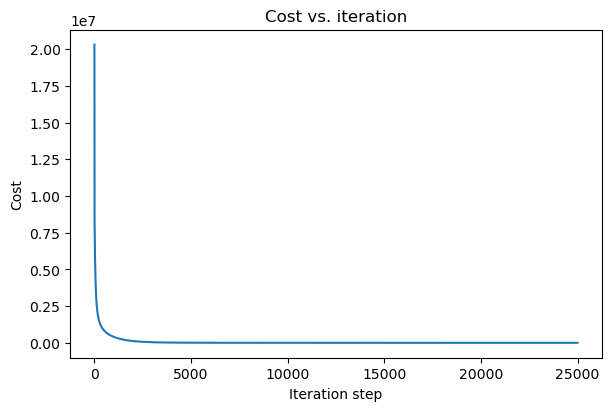

In [22]:
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(6, 4))
J_hist = Cost_history
ax1.plot(J_hist)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')             
ax1.set_xlabel('Iteration step')  
plt.show()

In [23]:
def predict():
    m = x_train.shape[0]
    predicted_value = []
    for i in range(m):
        print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")
        predicted_value.append(np.dot(x_train[i], w_final) + b_final)
    return predicted_value

In [24]:
y_pred = predict()

prediction: -5926.16, target value: -5928.102745620257
prediction: -756.28, target value: -738.8908552674725
prediction: -20202.38, target value: -20186.841586678274
prediction: 30145.41, target value: 30145.7716737989
prediction: -3458.97, target value: -3469.553887529065
prediction: -6288.38, target value: -6284.051735553898
prediction: -15378.64, target value: -15373.75370588322
prediction: 6205.61, target value: 6224.848303562386
prediction: 8560.71, target value: 8560.824390024925
prediction: -2889.50, target value: -2854.372975455441
prediction: 7888.01, target value: 7923.392838235297
prediction: 2619.44, target value: 2643.8852666918697
prediction: 13664.96, target value: 13654.464885864469
prediction: -2209.03, target value: -2199.6168930023546
prediction: 8967.91, target value: 9000.035731072428
prediction: -8090.74, target value: -8075.548918918746
prediction: 7195.17, target value: 7227.151609413143
prediction: -14683.82, target value: -14651.463352375386
prediction: -16988

In [25]:
y_pred_train = prediction(x_train, w_final, b_final)

In [26]:
y_pred_test = prediction(x_test, w_final, b_final)
y_pred_test

array([-3379.76741575,  8869.60140524, -4041.8111487 , ...,
       -8253.71313964, -9079.65218985,  3386.6164002 ])

Predictions vs True Values graph

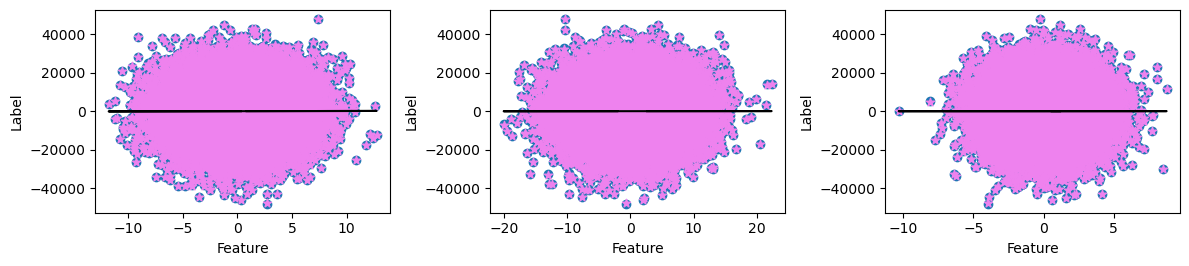

In [53]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(x_train[:,1],y_train,label='True')
ax[0].plot(x_train[:,1],w_final[1]*x_train[:,1],c='black',label='Predicted')
ax[0].scatter(x_train[:,1],y_pred_train,marker='*',c='violet',label='Predicted')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Label')

ax[1].scatter(x_train[:,2],y_train,label='True')
ax[1].plot(x_train[:,2],w_final[2]*x_train[:,2],c='black',label='Predicted')
ax[1].scatter(x_train[:,2],y_pred_train,marker='*',c='violet',label='Predicted')
ax[1].set_xlabel('Feature')
ax[1].set_ylabel('Label')

ax[2].scatter(x_train[:,3],y_train,label='True')
ax[2].plot(x_train[:,3],w_final[3]*x_train[:,3],c='black',label='Predicted')
ax[2].scatter(x_train[:,3],y_pred_train,marker='*',c='violet',label='Predicted')
ax[2].set_xlabel('Feature')
ax[2].set_ylabel('Label')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

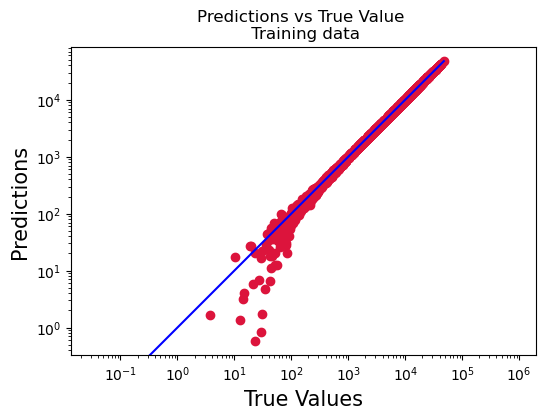

In [28]:
plt.figure(figsize=(6,4))
plt.scatter(y_train, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_train))
p2 = min(min(y_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Predictions vs True Value \n Training data")
plt.axis('equal')
plt.show()

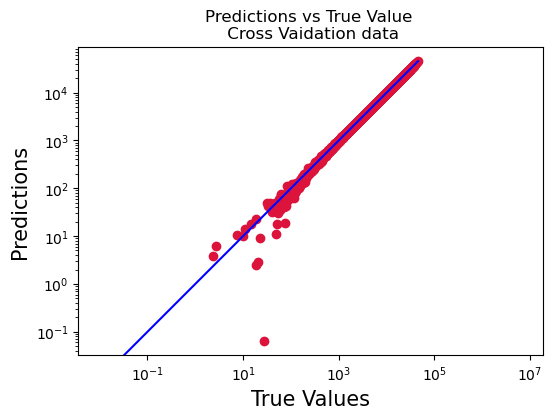

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_test), max(y_test))
p2 = min(min(y_pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Predictions vs True Value \n Cross Vaidation data")
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Computation of test cost

In [30]:
#Computation of test error
def compute_test_error(x, y, w, b, lambda_):
    m = x.shape[0]
    y_pred = np.matmul(x,w) + b
    error = y_pred - y
    j = np.matmul(np.transpose(error),error)/(2*m)
    reguralization = np.matmul(np.transpose(w),w)*lambda_/(2*m)
    j_test_reguralized = j + reguralization
    return j_test_reguralized

In [31]:
J_test = compute_test_error(x_test, y_test, w_final, b_final, lambda_tmp)

In [32]:
print(J_test)

293.3563209414645


R2 Score

In [33]:
#R2 Score
def R2_score(x, y, w, b):
    y_pred = prediction(x, w, b)
    error = y_pred - y 
    y_mean = np.mean(y)
    y1 = y - y_mean
    rss = np.matmul(np.transpose(error),error)
    tss = np.matmul(np.transpose(y1),y1)
    rss_tss = rss/tss
    r2 = 1 - rss_tss
    return r2

In [34]:
R2_Score_train = R2_score(x_train, y_train, w_final, b_final)
R2_Score_train

0.9999955159335259

In [35]:
R2_score_test = R2_score(x_test, y_test, w_final, b_final)
R2_score_test

0.9999955126671569

Test Data

In [36]:
d_test = pd.read_csv("Lineardata_test.csv")

In [37]:
X_test = d_test[d_test.columns.values]
X_test = X_test.drop(['ID'], axis=1)

In [38]:
X_test = X_test.to_numpy()

In [39]:
Y_test = prediction(X_test, w_final, b_final)

In [40]:
print(Y_test)

[ -5445.39749057  17513.0981219    4650.58549677 ...   9420.78608648
 -15209.31203505  -1448.7319392 ]


In [56]:
insert_index = 0
modified_array = np.insert(X_test, insert_index, Y_test, axis=1)

In [57]:
df = pd.DataFrame(modified_array)
file_path = 'Linear_regression.csv'
df.to_csv(file_path, index=False, header=False)